## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import time
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Loading Dataset

In [2]:
df = pd.read_csv('Alcohol_Sales.csv', index_col=0, parse_dates=True)
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [3]:
len(df)

325

In [4]:
df.isnull().sum()

S4248SM144NCEN    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   S4248SM144NCEN  325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


## Exploratory Data Analysis

<Axes: xlabel='DATE'>

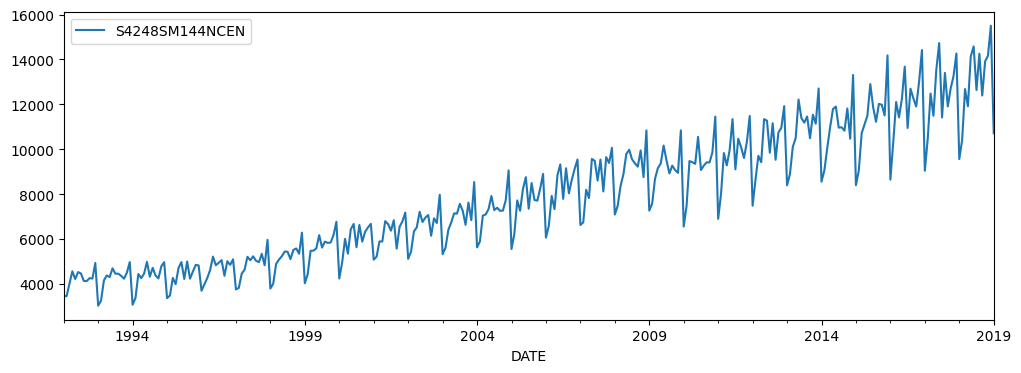

In [6]:
df.plot(figsize=(12,4))

## Changing the Data Type into Float

In [7]:
y = df['S4248SM144NCEN'].values.astype(float)
y

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

## Setting Training and Test Set Size

In [8]:
test_size = 12

In [9]:
train_set = y[:-test_size]
test_set = y[-test_size:]

In [10]:
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

## Normalization

In [11]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [12]:
train_normalized = scaler.fit_transform(train_set.reshape(-1,1))

In [13]:
train_normalized.min()

-1.0

In [14]:
train_normalized.max()

1.0

In [15]:
train_normalized.mean()

-0.2041940178388313

In [16]:
type(train_normalized)

numpy.ndarray

## Converting to Tensor

In [17]:
train_normalized = torch.FloatTensor(train_normalized).view(-1)
train_normalized

tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
        -0.8128, -0.7901, -0.7933, -0.6743, -1.0000, -0.9607, -0.8070, -0.7699,
        -0.7819, -0.7154, -0.7560, -0.7562, -0.7721, -0.7940, -0.7489, -0.6678,
        -0.9925, -0.9408, -0.7586, -0.7897, -0.7557, -0.6660, -0.7790, -0.7114,
        -0.7704, -0.7919, -0.7003, -0.6683, -0.9420, -0.9226, -0.7884, -0.8354,
        -0.7121, -0.6678, -0.7962, -0.6634, -0.7942, -0.7396, -0.6889, -0.6931,
        -0.8858, -0.8373, -0.7896, -0.7285, -0.6260, -0.6914, -0.6735, -0.6528,
        -0.7719, -0.6613, -0.6890, -0.6468, -0.8757, -0.8643, -0.7567, -0.7258,
        -0.6275, -0.6536, -0.6239, -0.6576, -0.6685, -0.6049, -0.6923, -0.4984,
        -0.8692, -0.8311, -0.6808, -0.6480, -0.6229, -0.5870, -0.5890, -0.6451,
        -0.5753, -0.5637, -0.6042, -0.4435, -0.8289, -0.7600, -0.5815, -0.5808,
        -0.5630, -0.4623, -0.5572, -0.5114, -0.5218, -0.5182, -0.4617, -0.3606,
        -0.7928, -0.6716, -0.4911, -0.60

## Preparaing Training Sequences

In [18]:
def input_data(sequence, window_size):
    output = []    # List of tuples
    length_of_sequence = len(sequence)

    for i in range(length_of_sequence - window_size):
        window = sequence[i: i + window_size]
        label = sequence[i + window_size: i + window_size + 1]
        output.append((window, label))

    return output

In [19]:
window_size = 12

train_data = input_data(
    sequence=train_normalized,
    window_size=window_size
)

In [20]:
len(train_data)

301

In [21]:
325-12-12

301

In [22]:
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]),
 tensor([-1.]))

## Creating LSTM Model

In [23]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=100, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)
        self.hidden = (
            torch.zeros(1,1,hidden_size), 
            torch.zeros(1,1,hidden_size)
        )

    def forward(self, sequence):
        lstm_out, self.hidden = self.lstm(
            sequence.view(len(sequence), 1, -1),
            self.hidden
        )
        prediction = self.linear(lstm_out.view(len(sequence), -1))
        return prediction[-1]

In [24]:
model = LSTM()
model

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [25]:
parameter_list = []
for param in model.parameters():
    parameter_list.append(param.numel())

print(f"Total Number of Parameters: {sum(parameter_list)}")

Total Number of Parameters: 41301


## Training the Model

In [26]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [27]:
epochs = 100

In [28]:
start_time = time.time()

for epoch in range(epochs):
    for sequence, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (
            torch.zeros(1,1,model.hidden_size), 
            torch.zeros(1,1,model.hidden_size)
        )

        y_pred = model(sequence)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch+1} Loss: {loss.item()}")

total_time = time.time() - start_time
print(f"Total Time: {total_time / 60}")

Epoch: 1 Loss: 0.32488885521888733
Epoch: 2 Loss: 0.27997058629989624
Epoch: 3 Loss: 0.37736427783966064
Epoch: 4 Loss: 0.37988701462745667
Epoch: 5 Loss: 0.32700982689857483
Epoch: 6 Loss: 0.3306127190589905
Epoch: 7 Loss: 0.32719454169273376
Epoch: 8 Loss: 0.33112555742263794
Epoch: 9 Loss: 0.3184930980205536
Epoch: 10 Loss: 0.30400896072387695
Epoch: 11 Loss: 0.30760523676872253
Epoch: 12 Loss: 0.2977508306503296
Epoch: 13 Loss: 0.2702585458755493
Epoch: 14 Loss: 0.2907763123512268
Epoch: 15 Loss: 0.2820436954498291
Epoch: 16 Loss: 0.24181880056858063
Epoch: 17 Loss: 0.2575590908527374
Epoch: 18 Loss: 0.2506064772605896
Epoch: 19 Loss: 0.1774444431066513
Epoch: 20 Loss: 0.12053371220827103
Epoch: 21 Loss: 0.045258551836013794
Epoch: 22 Loss: 0.01851538009941578
Epoch: 23 Loss: 0.09748650342226028
Epoch: 24 Loss: 0.009061410091817379
Epoch: 25 Loss: 0.02573349140584469
Epoch: 26 Loss: 0.006621278822422028
Epoch: 27 Loss: 0.0009824185399338603
Epoch: 28 Loss: 0.004163713194429874
Epoc

## Invert the normalization

In [29]:
future_forecast = 12

In [30]:
preds = train_normalized[-window_size:].tolist()

model.eval()

for forecast in range(future_forecast):
    sequence = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():
        model.hidden = (
            torch.zeros(1,1,model.hidden_size), 
            torch.zeros(1,1,model.hidden_size)
        )

        preds.append(model(sequence).item())

In [31]:
preds[window_size:]

[0.21341237425804138,
 0.5568487644195557,
 0.36823761463165283,
 0.7684611082077026,
 1.0471111536026,
 0.3979342579841614,
 0.7249678373336792,
 0.5263162851333618,
 0.623674213886261,
 0.7547725439071655,
 0.9713671207427979,
 0.12274540960788727]

In [32]:
true_predictions = scaler.inverse_transform(
    np.array(preds[window_size:]).reshape(-1,1)
)

true_predictions

array([[10128.85568322],
       [12137.78684747],
       [11034.50592679],
       [13375.61325246],
       [15005.576693  ],
       [11208.21644208],
       [13121.19936448],
       [11959.18710989],
       [12528.68231413],
       [13295.54199558],
       [14562.51197278],
       [ 9598.4992735 ]])

In [33]:
df['S4248SM144NCEN'][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

## Plot the Results

In [34]:
x = np.arange('2018-02-01', '2019-02-01', dtype="datetime64[M]")
x

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='datetime64[M]')

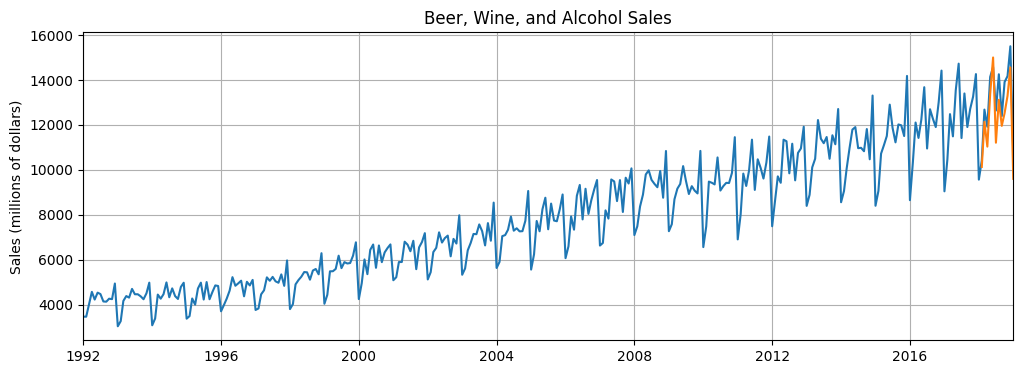

In [35]:
plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions)
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)');

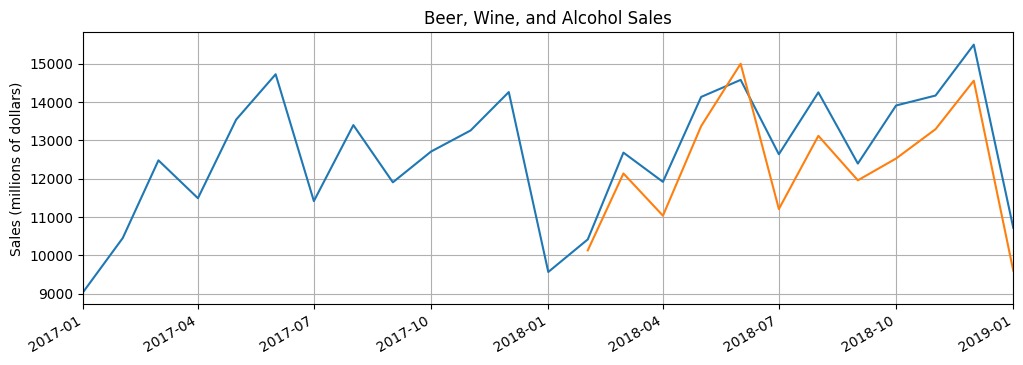

In [36]:
fig = plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions)
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)');

## Forecast into an unknown future

In [37]:
epochs = 100

In [38]:
# set model to back to training mode
model.train()

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [39]:
y_norm = scaler.fit_transform(y.reshape(-1, 1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm,window_size)

In [40]:
start_time = time.time()

for epoch in range(epochs):
    for sequence, y_train in all_data:
        optimizer.zero_grad()
        model.hidden = (
            torch.zeros(1,1,model.hidden_size), 
            torch.zeros(1,1,model.hidden_size)
        )

        y_pred = model(sequence)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch} Loss: {loss.item()}")

total_time = time.time() - start_time
print(f"Total Time: {total_time / 60}")

Epoch: 0 Loss: 0.01745952107012272
Epoch: 1 Loss: 0.03149935603141785
Epoch: 2 Loss: 0.029704425483942032
Epoch: 3 Loss: 0.013314480893313885
Epoch: 4 Loss: 0.009289289824664593
Epoch: 5 Loss: 0.007797622587531805
Epoch: 6 Loss: 0.006631918251514435
Epoch: 7 Loss: 0.005203434731811285
Epoch: 8 Loss: 0.003745068795979023
Epoch: 9 Loss: 0.0026345180813223124
Epoch: 10 Loss: 0.0018881082069128752
Epoch: 11 Loss: 0.0013270722702145576
Epoch: 12 Loss: 0.0008664021734148264
Epoch: 13 Loss: 0.0006622644723393023
Epoch: 14 Loss: 0.0006197668262757361
Epoch: 15 Loss: 0.0023682417813688517
Epoch: 16 Loss: 0.007298762910068035
Epoch: 17 Loss: 0.0019355935510247946
Epoch: 18 Loss: 0.0023490567691624165
Epoch: 19 Loss: 0.0019413209520280361
Epoch: 20 Loss: 0.0030949304345995188
Epoch: 21 Loss: 0.00016751352814026177
Epoch: 22 Loss: 0.002943196799606085
Epoch: 23 Loss: 0.005295097827911377
Epoch: 24 Loss: 0.003876680741086602
Epoch: 25 Loss: 0.005070971790701151
Epoch: 26 Loss: 0.004950272385030985


## Predict Future Values

In [41]:
window_size = 12
future_forecast = 12

In [42]:
preds = y[-window_size:].tolist()

for forecast in range(future_forecast):
    sequence = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():
        model.hidden = (
            torch.zeros(1,1,model.hidden_size), 
            torch.zeros(1,1,model.hidden_size)
        )

        preds.append(model(sequence).item())

In [43]:
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1, 1))

In [44]:
x = np.arange('2019-02-01', '2020-02-01', dtype='datetime64[M]').astype('datetime64[D]')

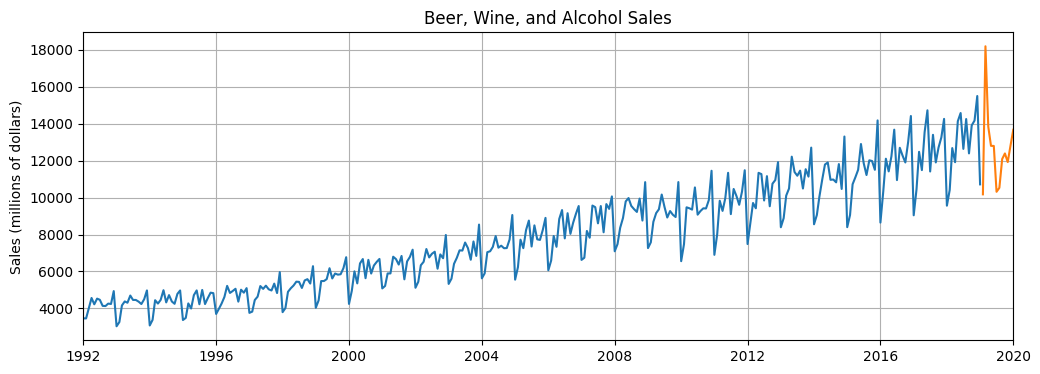

In [45]:
plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions[window_size:])
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)');

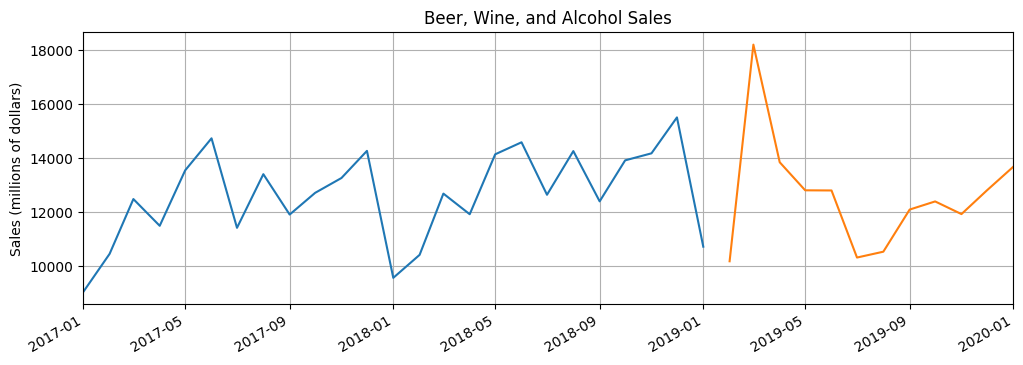

In [46]:
fig = plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions[window_size:])
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)');